In [33]:
#DEPENDENCIAS
#!pip install pandas
#!pip install matplotlib
#!pip install -U scikit-learn

In [27]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons, make_circles, make_classification

In [28]:
#IMPORTAR CONJUNTOS DE DATOS
datasets = pd.read_csv('/home/pilar/Documentos/pili/Noticias/ElComercio_abusosex.csv',delimiter=',',encoding='utf-8')#
#data = pd.read_excel('/home/pilar/Documentos/pili/noticiasg.xlsx', encoding='latin-1', delimiter='/t')#, error_bad_lines=False);data = pd.read_csv('/home/pilar/Documentos/pili/Noticias/ElComercio_abusosex.csv',delimiter=',',encoding='utf-8')#

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()
X=CV.fit_transform(data['news']).toarray()
#X=CV.fit_transform(data['news'][2000:4000]).toarray()
y= np.asarray(data['Unnamed: 2'])
#y=np.asarray(data['label'][2000:4000])

In [30]:
data.head()

,id,news,Unnamed: 2
0,17.0,9 feminicidio refiere asesinato mujer solo ...,1
1,18.0,desde noche sábado intensa llovizna cae lim...,0
2,19.0,en asentamiento humano 7 octubre familias h...,0
3,20.0,infografía alto bajos promedio altura cada ...,0
4,21.0,la selección francesa coronó tras derrotar ...,0


In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 0)

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/pilar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Se compara dos algoritmos de clasificación
###### https://scikit-learn.org/0.16/_sources/auto_examples/classification/plot_classifier_comparison.txt

Automatically created module for IPython interactive environment


ValueError: c of shape (1156,) not acceptable as a color sequence for x with size 1156, y with size 1156

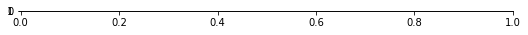

In [35]:
print(__doc__)
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

h = .5  # step size in the mesh

names = ["RBF SVM", "Naive Bayes"]
classifiers = [
    SVC(kernel = 'rbf',gamma="auto", C=1),
    GaussianNB()]

X, y = make_classification(n_features=4, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

figure = plt.figure(figsize=(30, 10))
i = 1
# iterate over datasets
for ds in data:
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.05, right=.95)
plt.show()

In [87]:
#PREDICCION EN X_TEST
y_pred = clf.predict(X_test)

#MATRIZ DE CONFUSION
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[21  0]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        19

avg / total       1.00      1.00      1.00        40

